In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


def plt_size(size=1.0):
    default_figsize = mpl.rcParamsDefault['figure.figsize']
    mpl.rcParams['figure.figsize'] = [val * size for val in default_figsize]

def gen_const(num):
    """
    Функция выбора базового значения МДП в зависимости от количества генераторов
    """
    if num == 8:
        return 655
    elif num == 7:
        return 635
    elif num == 6:
        return 580
    elif num == 5:
        return 525
    return 480


# Чтение csv
df = pd.read_csv('du.csv', delimiter=';')

# Добавление расчетного значения МДП
df = df.assign(Pmdp_du_calc2=df.GEN.apply(gen_const) + 545 * (1 - df.Pkaes / df.Pust_kaes) +
                             124 * (1 - df.Pges / df.Pust_ges) - df.NK)
df = df.assign(Delta=df.Pmdp_du - df.Pmdp_du_calc2)

# Выборорка по нормальной схеме
df = df[df.Sheme == 1]

# Формирование выборок в зависимости от количества генераторов
df_8gen = df[df.GEN == 8].reset_index(drop=True)
df_7gen = df[df.GEN == 7].reset_index(drop=True)
df_6gen = df[df.GEN == 6].reset_index(drop=True)
df_5gen = df[df.GEN == 5].reset_index(drop=True)
df_4gen = df[df.GEN == 4].reset_index(drop=True)

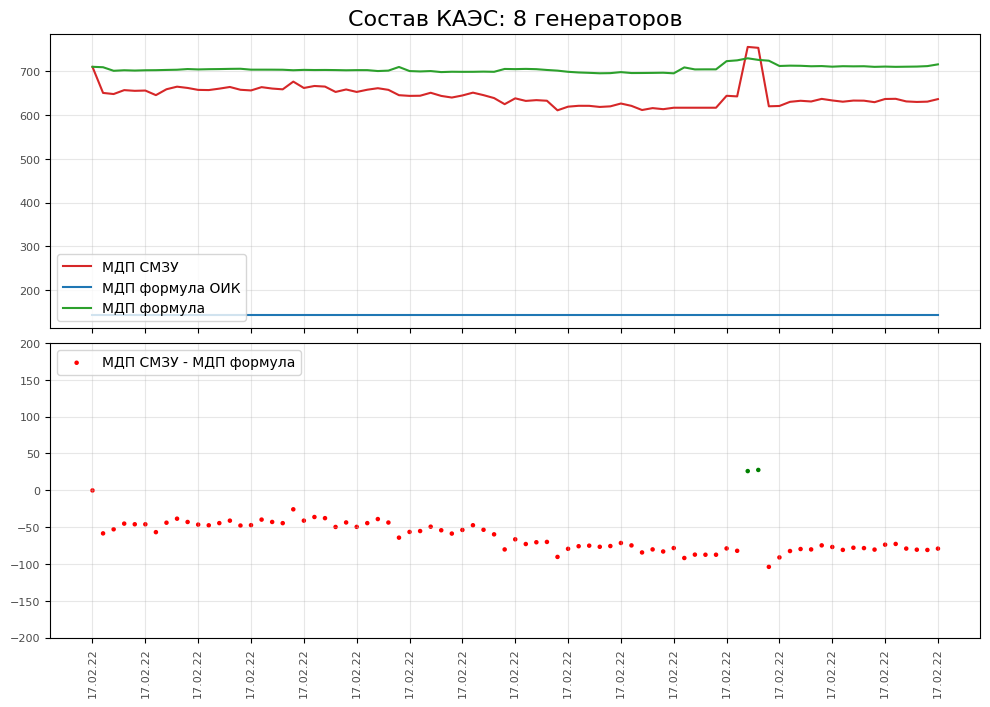

In [3]:
xaxis_8gen = 5
xtick_location = df_8gen.index.tolist()[::xaxis_8gen]
xtick_labels = [x[:8] for x in df_8gen.Date.tolist()[::xaxis_8gen]]

fig = plt.figure(figsize=(12, 8), dpi=100)
plt.subplot(2, 1, 1)
plt.plot('Date', 'Pmdp_du', data=df_8gen, color='tab:red', label='МДП СМЗУ')
plt.plot('Date', 'Pmdp_du_calc', data=df_8gen, color='tab:blue', label='МДП формула ОИК')
plt.plot('Date', 'Pmdp_du_calc2', data=df_8gen, color='tab:green', label='МДП формула')

plt.title("Состав КАЭС: 8 генераторов", fontsize=16)
plt.xticks(ticks=xtick_location, labels='', rotation=0, fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=8, alpha=.7)
plt.grid(axis='both', alpha=.3)
plt.legend(loc='lower left', fontsize=10)

plt.subplot(2, 1, 2)
plt.scatter('Date', 'Delta', data=df_8gen, color=df_8gen.Delta.apply(lambda x: 'red' if x < 0 else 'green'),
            label='МДП СМЗУ - МДП формула', s=5)

plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=8, alpha=.7)
plt.ylim(-200, 200)
plt.grid(axis='both', alpha=.3)
plt.legend(loc='upper left', fontsize=10)

plt.subplots_adjust(hspace=0.05)
plt.show()

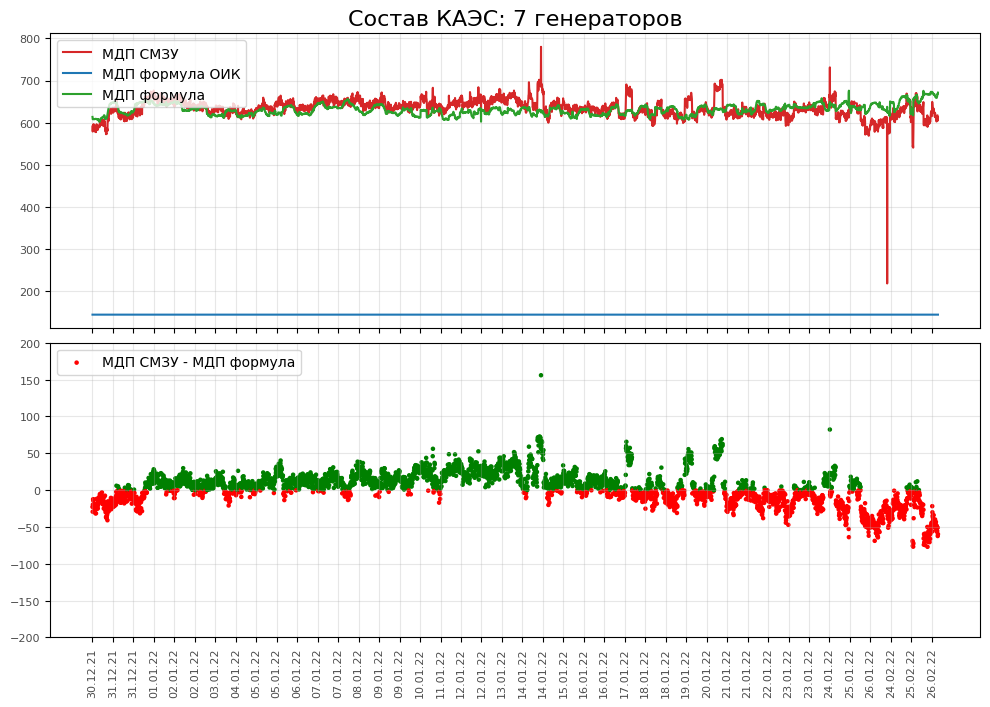

In [4]:
xaxis_7gen = 100
xtick_location = df_7gen.index.tolist()[::xaxis_7gen]
xtick_labels = [x[:8] for x in df_7gen.Date.tolist()[::xaxis_7gen]]

fig = plt.figure(figsize=(12, 8), dpi=100)
plt.subplot(2, 1, 1)
plt.plot('Date', 'Pmdp_du', data=df_7gen, color='tab:red', label='МДП СМЗУ')
plt.plot('Date', 'Pmdp_du_calc', data=df_7gen, color='tab:blue', label='МДП формула ОИК')
plt.plot('Date', 'Pmdp_du_calc2', data=df_7gen, color='tab:green', label='МДП формула')

plt.title("Состав КАЭС: 7 генераторов", fontsize=16)
plt.xticks(ticks=xtick_location, labels='', rotation=0, fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=8, alpha=.7)
plt.grid(axis='both', alpha=.3)
plt.legend(loc='upper left')

plt.subplot(2, 1, 2)
plt.scatter('Date', 'Delta', data=df_7gen, color=df_7gen.Delta.apply(lambda x: 'red' if x < 0 else 'green'),
            label='МДП СМЗУ - МДП формула', s=5)

plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=8, alpha=.7)
plt.ylim(-200, 200)
plt.grid(axis='both', alpha=.3)
plt.legend(loc='upper left')

plt.subplots_adjust(hspace=0.05)
plt.show()

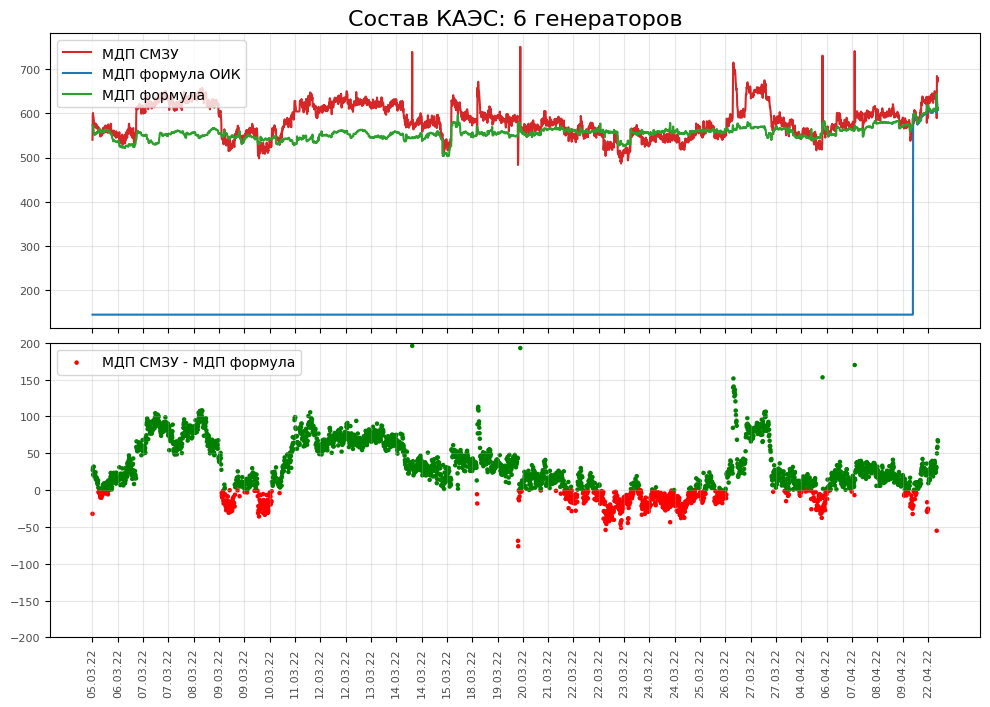

In [5]:
xaxis_6gen = 100
xtick_location = df_6gen.index.tolist()[::xaxis_6gen]
xtick_labels = [x[:8] for x in df_6gen.Date.tolist()[::xaxis_6gen]]

fig = plt.figure(figsize=(12, 8), dpi=100)
plt.subplot(2, 1, 1)
plt.plot('Date', 'Pmdp_du', data=df_6gen, color='tab:red', label='МДП СМЗУ')
plt.plot('Date', 'Pmdp_du_calc', data=df_6gen, color='tab:blue', label='МДП формула ОИК')
plt.plot('Date', 'Pmdp_du_calc2', data=df_6gen, color='tab:green', label='МДП формула')

plt.title("Состав КАЭС: 6 генераторов", fontsize=16)
plt.xticks(ticks=xtick_location, labels='', rotation=0, fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=8, alpha=.7)
plt.grid(axis='both', alpha=.3)
plt.legend(loc='upper left')

plt.subplot(2, 1, 2)
plt.scatter('Date', 'Delta', data=df_6gen, color=df_6gen.Delta.apply(lambda x: 'red' if x < 0 else 'green'),
            label='МДП СМЗУ - МДП формула', s=5)

plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=8, alpha=.7)
plt.ylim(-200, 200)
plt.grid(axis='both', alpha=.3)
plt.legend(loc='upper left')

plt.subplots_adjust(hspace=0.05)
plt.show()

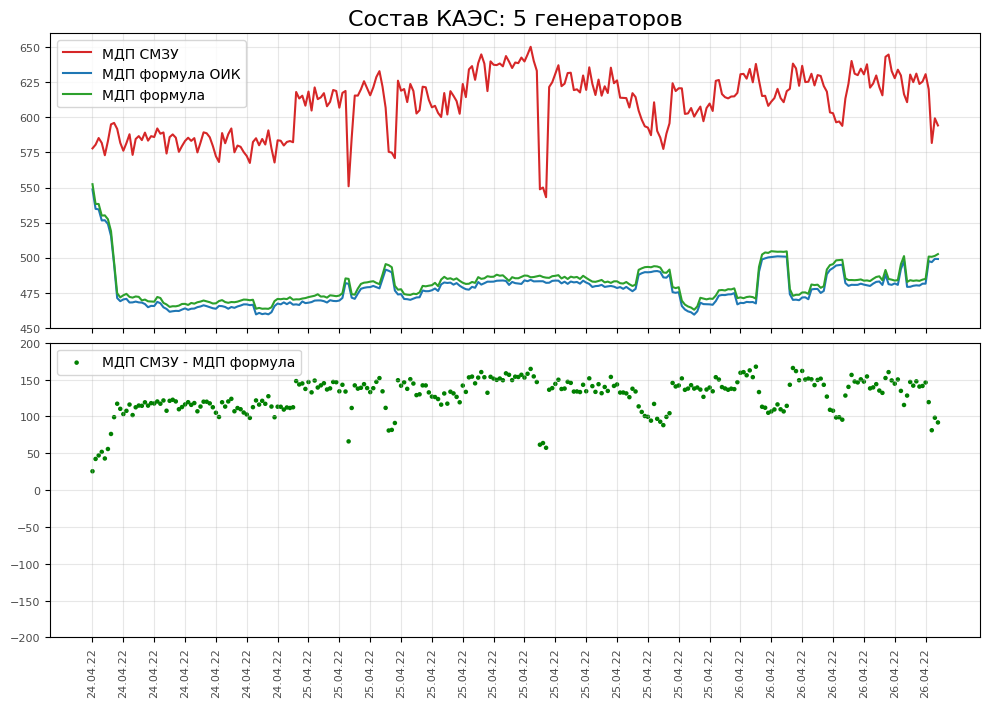

In [6]:
xaxis_5gen = 10
xtick_location = df_5gen.index.tolist()[::xaxis_5gen]
xtick_labels = [x[:8] for x in df_5gen.Date.tolist()[::xaxis_5gen]]

fig = plt.figure(figsize=(12, 8), dpi=100)
plt.subplot(2, 1, 1)
plt.plot('Date', 'Pmdp_du', data=df_5gen, color='tab:red', label='МДП СМЗУ')
plt.plot('Date', 'Pmdp_du_calc', data=df_5gen, color='tab:blue', label='МДП формула ОИК')
plt.plot('Date', 'Pmdp_du_calc2', data=df_5gen, color='tab:green', label='МДП формула')

plt.title("Состав КАЭС: 5 генераторов", fontsize=16)
plt.xticks(ticks=xtick_location, labels='', rotation=0, fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=8, alpha=.7)
plt.grid(axis='both', alpha=.3)
plt.legend(loc='upper left')

plt.subplot(2, 1, 2)
plt.scatter('Date', 'Delta', data=df_5gen, color=df_5gen.Delta.apply(lambda x: 'red' if x < 0 else 'green'),
            label='МДП СМЗУ - МДП формула', s=5)

plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=8, alpha=.7)
plt.ylim(-200, 200)
plt.grid(axis='both', alpha=.3)
plt.legend(loc='upper left')

plt.subplots_adjust(hspace=0.05)
plt.show()

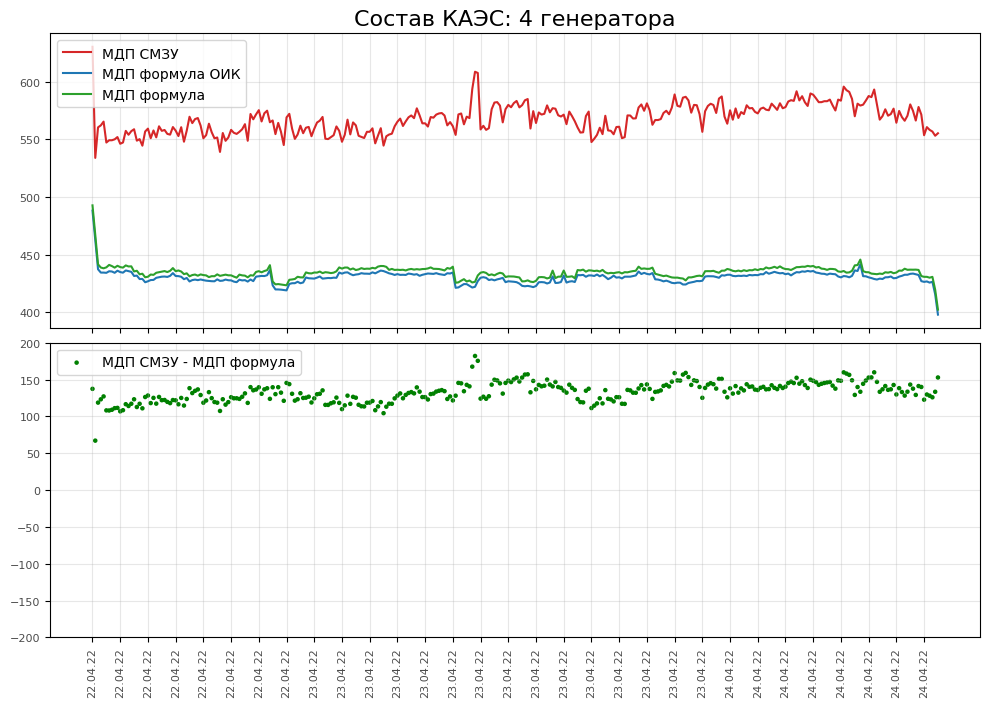

In [7]:
xaxis_4gen = 10
xtick_location = df_4gen.index.tolist()[::xaxis_4gen]
xtick_labels = [x[:8] for x in df_4gen.Date.tolist()[::xaxis_4gen]]

fig = plt.figure(figsize=(12, 8), dpi=100)
plt.subplot(2, 1, 1)
plt.plot('Date', 'Pmdp_du', data=df_4gen, color='tab:red', label='МДП СМЗУ')
plt.plot('Date', 'Pmdp_du_calc', data=df_4gen, color='tab:blue', label='МДП формула ОИК')
plt.plot('Date', 'Pmdp_du_calc2', data=df_4gen, color='tab:green', label='МДП формула')

plt.title("Состав КАЭС: 4 генератора", fontsize=16)
plt.xticks(ticks=xtick_location, labels='', rotation=0, fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=8, alpha=.7)
plt.grid(axis='both', alpha=.3)
plt.legend(loc='upper left')

plt.subplot(2, 1, 2)
plt.scatter('Date', 'Delta', data=df_4gen, color=df_4gen.Delta.apply(lambda x: 'red' if x < 0 else 'green'),
            label='МДП СМЗУ - МДП формула', s=5)

plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=8, alpha=.7)
plt.ylim(-200, 200)
plt.grid(axis='both', alpha=.3)
plt.legend(loc='upper left')

plt.subplots_adjust(hspace=0.05)
plt.show()

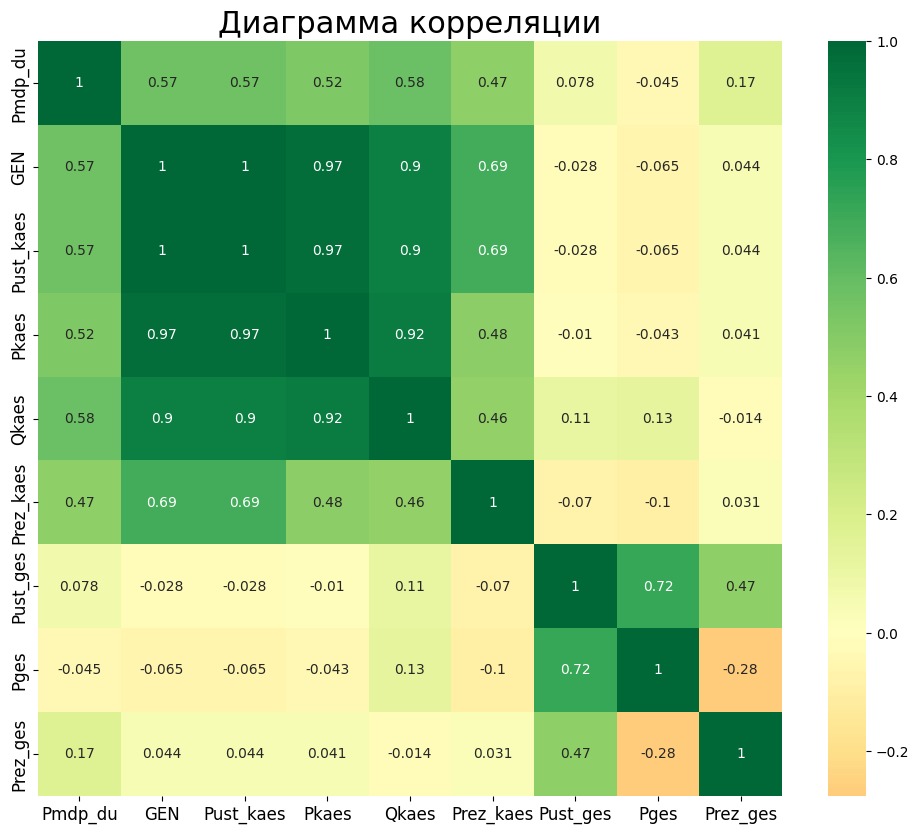

In [8]:
plt.figure(figsize=(12, 10), dpi=100)
sns.heatmap(
    df[['Pmdp_du', 'GEN', 'Pust_kaes', 'Pkaes', 'Qkaes', 'Prez_kaes', 'Pust_ges', 'Pges', 'Prez_ges']].corr(),
    xticklabels=df[['Pmdp_du', 'GEN', 'Pust_kaes', 'Pkaes', 'Qkaes', 'Prez_kaes', 'Pust_ges', 'Pges', 'Prez_ges']].corr().columns,
    yticklabels=df[['Pmdp_du', 'GEN', 'Pust_kaes', 'Pkaes', 'Qkaes', 'Prez_kaes', 'Pust_ges', 'Pges', 'Prez_ges']].corr().columns,
    cmap='RdYlGn', center=0, annot=True)
plt.title('Диаграмма корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

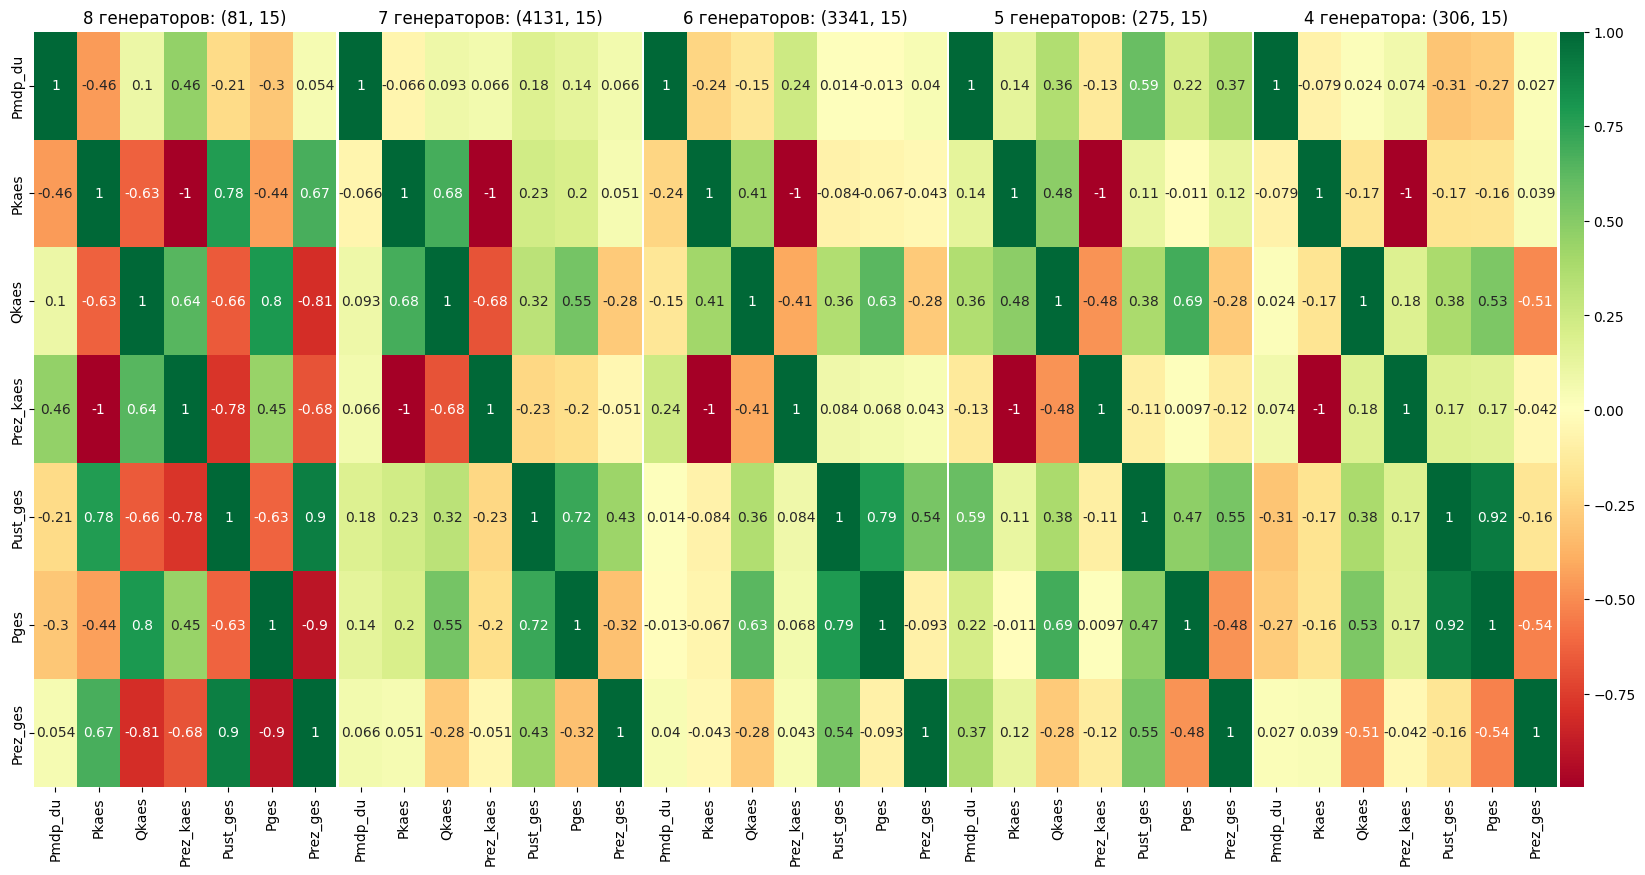

In [9]:
fig, (ax1, ax2, ax3, ax4, ax5, axcb) = plt.subplots(1, 6,
                                     gridspec_kw={'width_ratios': [1, 1, 1, 1, 1, 0.08]},
                                                   figsize=(20, 10), dpi=100)
ax1.get_shared_y_axes().join(ax2, ax3, ax4, ax5)
fig.subplots_adjust(wspace=0.01)

g1 = sns.heatmap(
    df_8gen[['Pmdp_du', 'Pkaes', 'Qkaes', 'Prez_kaes', 'Pust_ges', 'Pges', 'Prez_ges']].corr(),
    xticklabels=df_8gen[
        ['Pmdp_du', 'Pkaes', 'Qkaes', 'Prez_kaes', 'Pust_ges', 'Pges', 'Prez_ges']].corr().columns,
    yticklabels=df_8gen[['Pmdp_du', 'Pkaes', 'Qkaes', 'Prez_kaes', 'Pust_ges', 'Pges',
                         'Prez_ges']].corr().columns,
    cmap='RdYlGn', center=0, annot=True, ax=ax1, cbar=False, fmt='.2g')
g1.set_ylabel('')
g1.set_xlabel('')
g1.set_title(f'8 генераторов: {df_8gen.shape}')

g2 = sns.heatmap(
    df_7gen[['Pmdp_du', 'Pkaes', 'Qkaes', 'Prez_kaes', 'Pust_ges', 'Pges', 'Prez_ges']].corr(),
    xticklabels=df_7gen[
        ['Pmdp_du', 'Pkaes', 'Qkaes', 'Prez_kaes', 'Pust_ges', 'Pges', 'Prez_ges']].corr().columns,
    yticklabels=df_7gen[['Pmdp_du', 'Pkaes', 'Qkaes', 'Prez_kaes', 'Pust_ges', 'Pges',
                         'Prez_ges']].corr().columns,
    cmap='RdYlGn', center=0, annot=True, ax=ax2, cbar=False, fmt='.2g')
g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticks([])
g2.set_title(f'7 генераторов: {df_7gen.shape}')

g3 = sns.heatmap(
    df_6gen[['Pmdp_du', 'Pkaes', 'Qkaes', 'Prez_kaes', 'Pust_ges', 'Pges', 'Prez_ges']].corr(),
    xticklabels=df_6gen[
        ['Pmdp_du', 'Pkaes', 'Qkaes', 'Prez_kaes', 'Pust_ges', 'Pges', 'Prez_ges']].corr().columns,
    yticklabels=df_6gen[['Pmdp_du', 'Pkaes', 'Qkaes', 'Prez_kaes', 'Pust_ges', 'Pges',
                         'Prez_ges']].corr().columns,
    cmap='RdYlGn', center=0, annot=True, ax=ax3, cbar=False, fmt='.2g')
g3.set_ylabel('')
g3.set_xlabel('')
g3.set_yticks([])
g3.set_title(f'6 генераторов: {df_6gen.shape}')

g4 = sns.heatmap(
    df_5gen[['Pmdp_du', 'Pkaes', 'Qkaes', 'Prez_kaes', 'Pust_ges', 'Pges', 'Prez_ges']].corr(),
    xticklabels=df_5gen[
        ['Pmdp_du', 'Pkaes', 'Qkaes', 'Prez_kaes', 'Pust_ges', 'Pges', 'Prez_ges']].corr().columns,
    yticklabels=df_5gen[['Pmdp_du', 'Pkaes', 'Qkaes', 'Prez_kaes', 'Pust_ges', 'Pges',
                         'Prez_ges']].corr().columns,
    cmap='RdYlGn', center=0, annot=True, ax=ax4, cbar=False, fmt='.2g')
g4.set_ylabel('')
g4.set_xlabel('')
g4.set_yticks([])
g4.set_title(f'5 генераторов: {df_5gen.shape}')

g5 = sns.heatmap(
    df_4gen[['Pmdp_du', 'Pkaes', 'Qkaes', 'Prez_kaes', 'Pust_ges', 'Pges', 'Prez_ges']].corr(),
    xticklabels=df_4gen[
        ['Pmdp_du', 'Pkaes', 'Qkaes', 'Prez_kaes', 'Pust_ges', 'Pges', 'Prez_ges']].corr().columns,
    yticklabels=df_4gen[['Pmdp_du', 'Pkaes', 'Qkaes', 'Prez_kaes', 'Pust_ges', 'Pges',
                         'Prez_ges']].corr().columns,
    cmap='RdYlGn', center=0, annot=True, ax=ax5, cbar_ax=axcb, fmt='.2g')
g5.set_ylabel('')
g5.set_xlabel('')
g5.set_yticks([])
g5.set_title(f'4 генератора: {df_4gen.shape}')

plt.show()

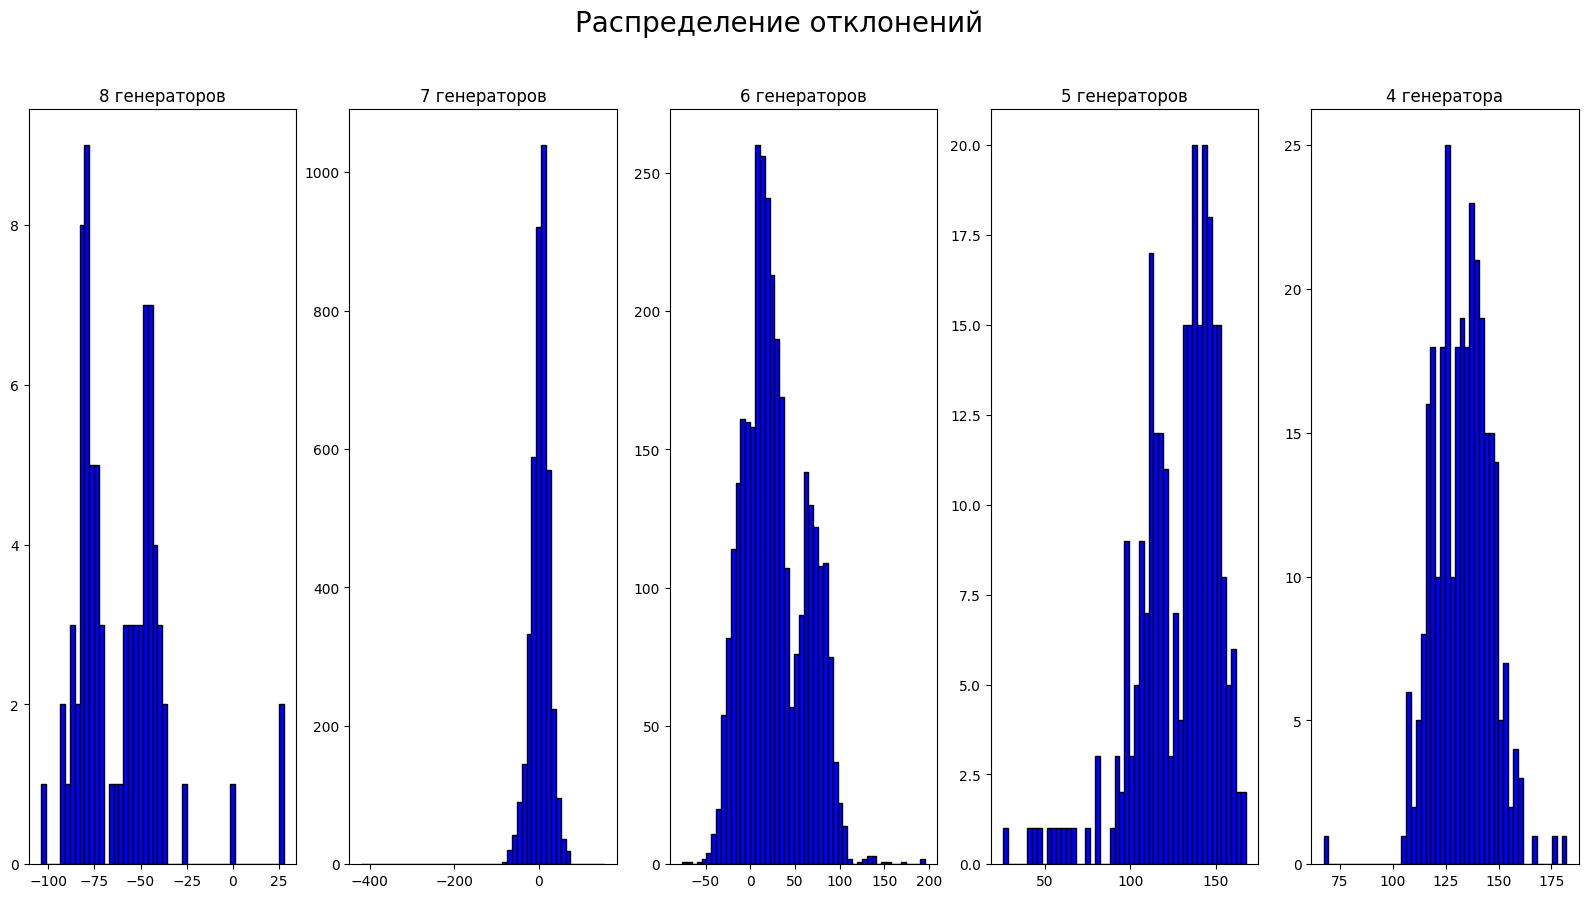

In [10]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 10), dpi=100)
fig.subplots_adjust(wspace=0.2)
fig.suptitle('Распределение отклонений', fontsize=20)
ax1.hist(df_8gen.Delta, color='blue', edgecolor='black', bins=50)
ax1.set_title('8 генераторов')
ax2.hist(df_7gen.Delta, color='blue', edgecolor='black', bins=50)
ax2.set_title('7 генераторов')
ax3.hist(df_6gen.Delta, color='blue', edgecolor='black', bins=50)
ax3.set_title('6 генераторов')
ax4.hist(df_5gen.Delta, color='blue', edgecolor='black', bins=50)
ax4.set_title('5 генераторов')
ax5.hist(df_4gen.Delta, color='blue', edgecolor='black', bins=50)
ax5.set_title('4 генератора')

plt.show()